In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
results = search_images_ddg('grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

200

In [3]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [4]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

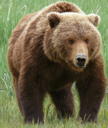

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [7]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [8]:
fns = get_image_files(path)
fns

(#571) [Path('bears/grizzly/2dafcf11-6330-449b-b6a0-bb7b65aa6011.jpg'),Path('bears/grizzly/a427941c-f6d5-4ef2-9b0a-10dc8ab8970d.jpg'),Path('bears/grizzly/3d3fc1e6-a768-4db1-ac13-4d03b4be8f1e.jpg'),Path('bears/grizzly/b58e5013-7170-471b-ac1f-15f436586773.jpg'),Path('bears/grizzly/ab141b96-1783-459b-b769-5983ca4059e7.jpg'),Path('bears/grizzly/a2bbc984-56e6-497e-9633-01046e5ffb5e.jpg'),Path('bears/grizzly/3b99f28b-f271-431d-856b-8817750db5dd.jpg'),Path('bears/grizzly/89a13b49-b88e-43dd-a0e8-c72a57d3ead4.jpg'),Path('bears/grizzly/ae3e8e46-5b0b-484b-9e9d-5fdef62c8a04.png'),Path('bears/grizzly/9f4131ea-b26f-4426-9d7f-ac1f5b7f538e.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#29) [Path('bears/grizzly/c03eb1e4-01a6-40f1-a3e8-a43862d6b7ae.jpg'),Path('bears/grizzly/4e21dc05-3d2c-4b93-8254-5231e0cf8fd9.jpg'),Path('bears/grizzly/df0f2184-b1ae-416c-8c4a-25901aa0f2d1.jpg'),Path('bears/grizzly/2245728e-c975-445a-b6d8-9583ba2b36e1.jpg'),Path('bears/grizzly/48b5dfb8-4e99-4436-bc25-256f04881fa6.jpg'),Path('bears/grizzly/7567ec26-111f-4eb8-b900-149b135a3fb0.JPG'),Path('bears/grizzly/18b8a7b3-0eb2-423e-b07e-03114e69586b.jpg'),Path('bears/grizzly/6cef1be9-9c42-40c1-b428-09912b1d676f.jpg'),Path('bears/grizzly/fed93536-5b34-451a-8373-9150705022c2.jpg'),Path('bears/black/5d8cf47c-0203-4d7f-9333-3d48c034c0d3.jpg')...]

In [10]:
failed.map(Path.unlink);

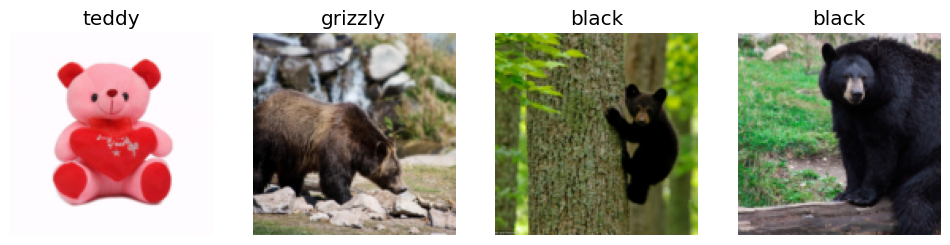

In [11]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

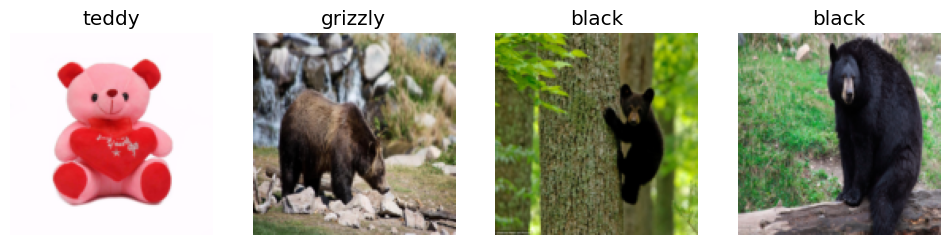

In [12]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

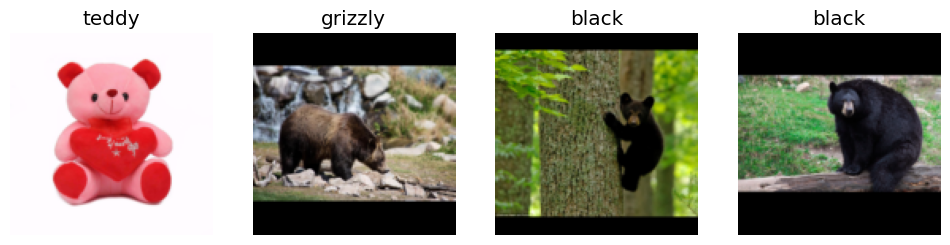

In [13]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

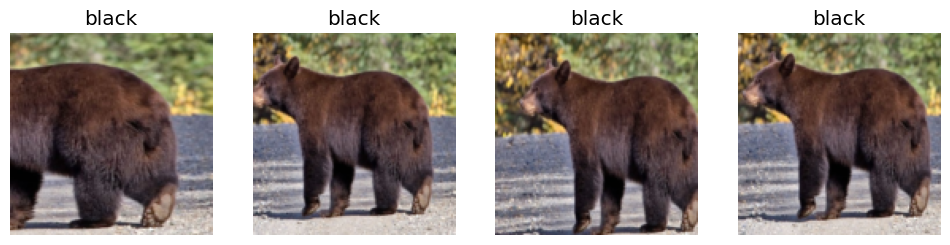

In [14]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

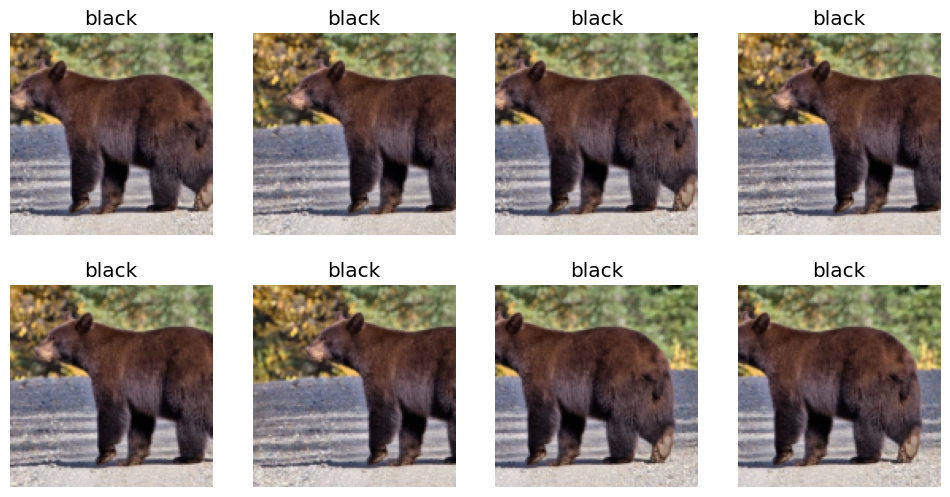

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms)
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.183007,0.100190,0.027778,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.187698,0.105241,0.027778,00:05
1,0.162532,0.079719,0.018519,00:05
2,0.150315,0.065832,0.018519,00:05
3,0.133547,0.071570,0.009259,00:05


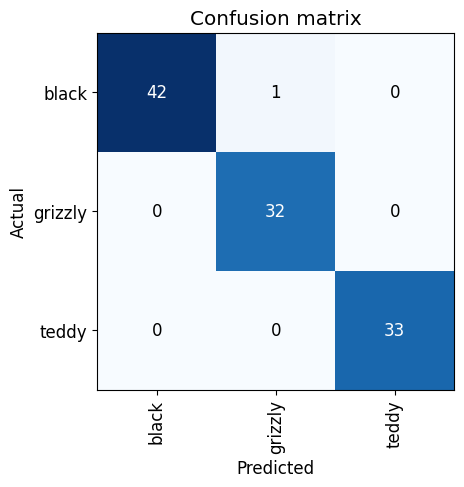

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

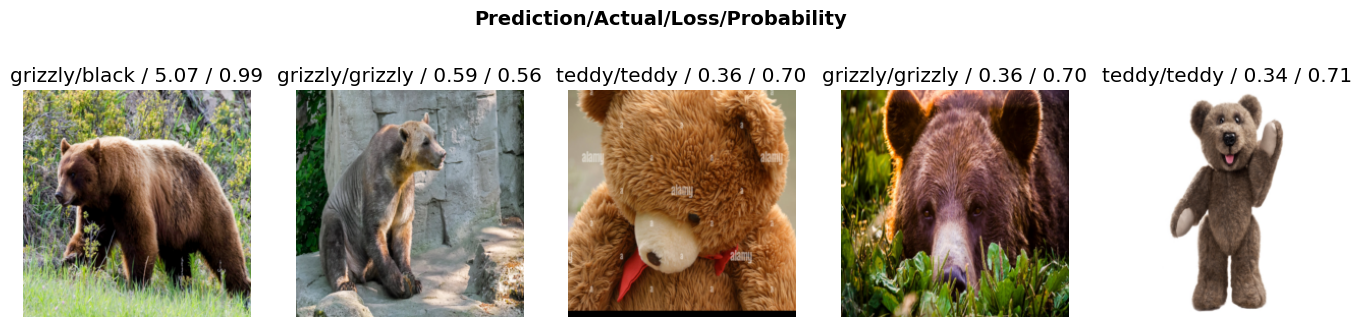

In [19]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner